In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import io

In [36]:
path = 'data/INFLUD21.csv'
df1 = pd.read_csv(path, sep=";", encoding="latin-1", low_memory=False)

path = 'data/INFLUD22.csv'
df2 = pd.read_csv(path, sep=";", encoding="latin-1", low_memory=False)

path = 'data/INFLUD23.csv'
df3 = pd.read_csv(path, sep=";", encoding="latin-1", low_memory=False)

path = 'data/INFLUD24.csv'
df4 = pd.read_csv(path, sep=";", encoding="latin-1", low_memory=False)

path = 'data/INFLUD25.csv'
df5 = pd.read_csv(path, sep=";", encoding="latin-1", low_memory=False)

In [34]:
df21 = df1[['DT_NOTIFIC','SEM_NOT','DT_SIN_PRI']]
df21['DT_NOTIFIC'] = pd.to_datetime(df21['DT_NOTIFIC'], format="%Y-%m-%d" )
start_date = pd.Timestamp("2021-01-01")
end_date = pd.Timestamp("2021-12-31")
df21 = df21[(df21['DT_NOTIFIC'] >= start_date) & (df21['DT_NOTIFIC'] <= end_date)]
series21 = df21.groupby(df21['DT_NOTIFIC'].dt.date).size().reset_index(name='Cases')
series21.columns = ['Date', 'Number']
series21 = series21.sort_values('Date')
series21

## Importantes: ['NU_NOTIFIC','SEM_NOT','DT_SIN_PRI']

/tmp/ipykernel_144877/69381274.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df21['DT_NOTIFIC'] = pd.to_datetime(df21['DT_NOTIFIC'], format="%Y-%m-%d" )


,Date,Number
0,2021-01-03,189
1,2021-01-04,559
2,2021-01-05,941
3,2021-01-06,1347
4,2021-01-07,1823
...,...,...
358,2021-12-27,3679
359,2021-12-28,3293
360,2021-12-29,3091
361,2021-12-30,2989


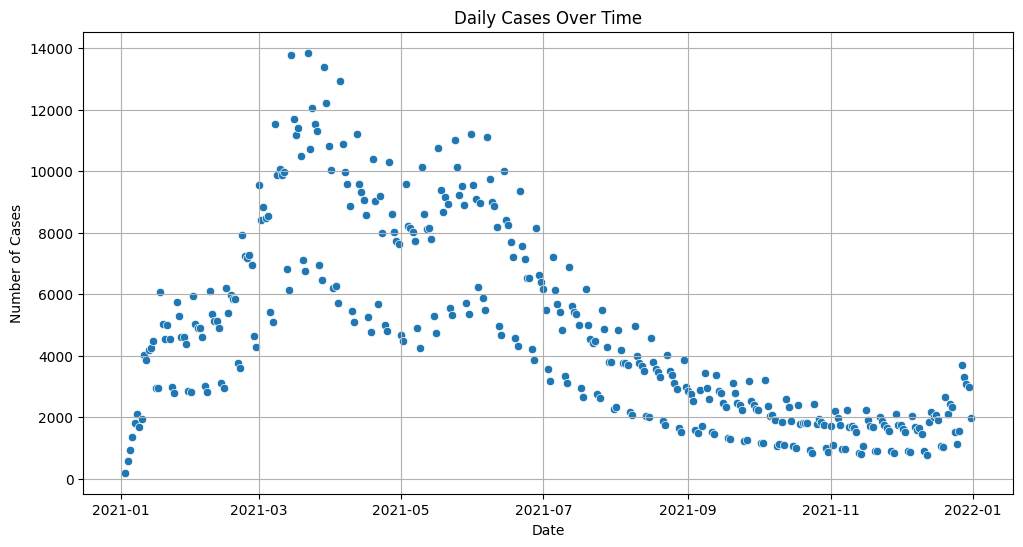

In [35]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x="Date", y="Number", data=series21)  # Gráfico de pontos
plt.title('Daily Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.grid(True)
plt.show()

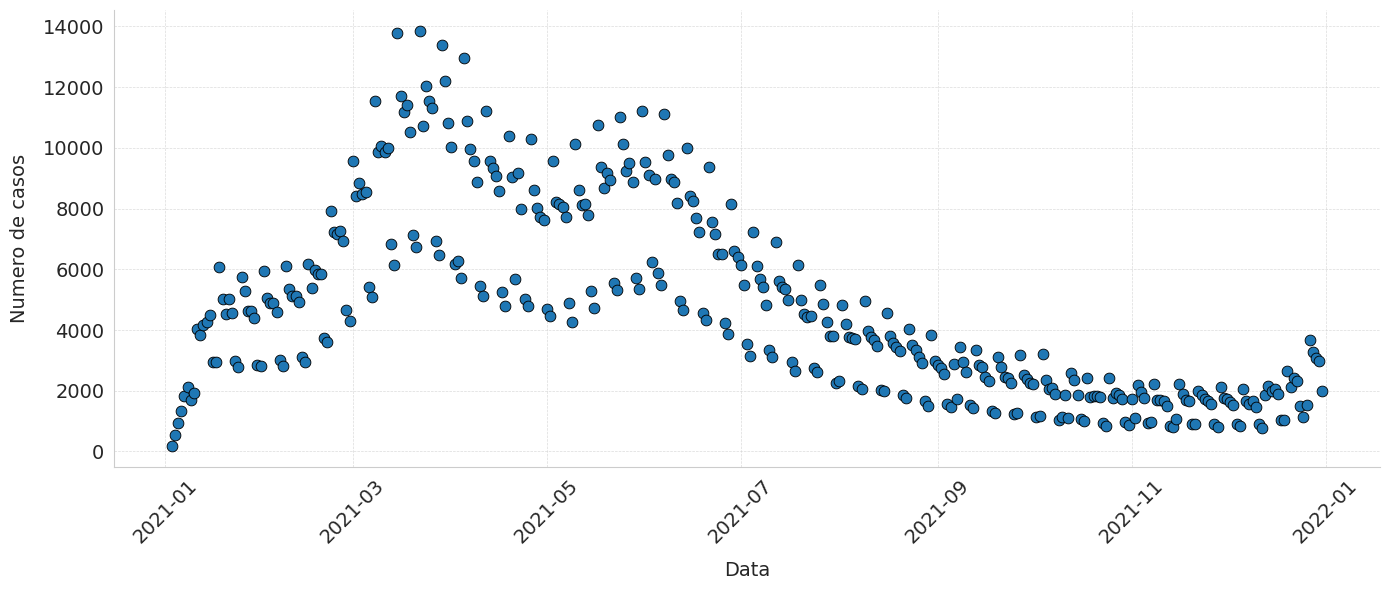

In [47]:
# Estilo profissional
plt.figure(figsize=(14, 6))
sns.set_style("whitegrid")

# Gráfico de dispersão com cor e tamanho ajustados
sns.scatterplot(
    x="Date",
    y="Number",
    data=series21,
    color="#1f77b4",  # azul profissional
    s=60,             # tamanho dos pontos
    edgecolor="black"
)

# Título e eixos com fonte apropriada
plt.xlabel('Data', fontsize=14, labelpad=10)
plt.ylabel('Numero de casos', fontsize=14, labelpad=10)

# Ajuste de ticks
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

# Grade sutil
plt.grid(True, which='major', linestyle='--', linewidth=0.5, alpha=0.7)

# Remove o contorno da borda superior e direita
sns.despine()

# Layout mais compacto
plt.tight_layout()
plt.show()

In [37]:
df2

,NU_NOTIFIC,DT_NOTIFIC,SEM_NOT,DT_SIN_PRI,SEM_PRI,SG_UF_NOT,ID_REGIONA,CO_REGIONA,ID_MUNICIP,CO_MUN_NOT,...,VG_OMS,VG_OMSOUT,VG_LIN,VG_MET,VG_METOUT,VG_DTRES,VG_ENC,VG_REINF,VG_CODEST,REINF
0,315907692208,2022-03-16,11,2022-03-16,11,RJ,NaN,NaN,SAO GONCALO,330490.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,315923183982,2022-06-06,23,2022-06-04,22,SP,GVE VII SANTO ANDRE,1332.0,SAO CAETANO DO SUL,354880.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,315925802384,2022-07-22,29,2022-07-15,28,SP,GVE VII SANTO ANDRE,1332.0,SAO CAETANO DO SUL,354880.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,315935260451,2022-02-21,8,2022-02-20,8,CE,21 CRES JUAZEIRO DO NORTE,1531.0,JUAZEIRO DO NORTE,230730.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
4,315944753124,2022-01-11,2,2022-01-08,1,CE,21 CRES JUAZEIRO DO NORTE,1531.0,JUAZEIRO DO NORTE,230730.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560572,31747332211810,2025-05-15,20,2022-05-15,20,MG,DIVINOPOLIS,1472.0,CAMPO BELO,311120.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
560573,31747849770903,2022-08-03,31,2022-07-18,29,MG,BELO HORIZONTE,1449.0,CONTAGEM,311860.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
560574,31747942589900,2025-04-10,15,2022-04-09,14,MG,BELO HORIZONTE,1449.0,CONTAGEM,311860.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
560575,31748960622264,2025-06-03,23,2022-05-29,22,SE,REGIONAL LAGARTO,2059.0,LAGARTO,280350.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0


,DT_NOTIFIC,SEM_NOT,DT_SIN_PRI
368266,2022-01-05,29,2022-07-16
406636,2022-04-07,32,2022-08-04


/tmp/ipykernel_144877/3557716325.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df22['DT_NOTIFIC'] = pd.to_datetime(df22['DT_NOTIFIC'], format="%Y-%m-%d" )


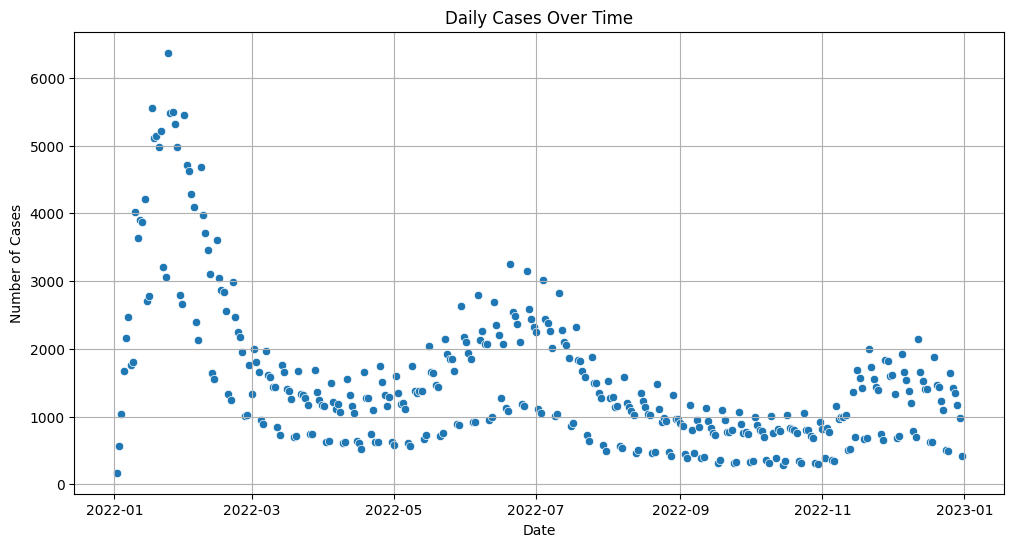

In [38]:
df22 = df2[['DT_NOTIFIC','SEM_NOT','DT_SIN_PRI']]
df22['DT_NOTIFIC'] = pd.to_datetime(df22['DT_NOTIFIC'], format="%Y-%m-%d" )
start_date = pd.Timestamp("2022-01-01")
end_date = pd.Timestamp("2022-12-31")
df22 = df22[(df22['DT_NOTIFIC'] >= start_date) & (df22['DT_NOTIFIC'] <= end_date)]
series22 = df22.groupby(df22['DT_NOTIFIC'].dt.date).size().reset_index(name='Cases')
series22.columns = ['Date', 'Number']
series22 = series22.sort_values('Date')
plt.figure(figsize=(12, 6))
sns.scatterplot(x="Date", y="Number", data=series22)  # Gráfico de pontos
plt.title('Daily Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.grid(True)
plt.show()

/tmp/ipykernel_144877/1135676616.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df23['DT_NOTIFIC'] = pd.to_datetime(df23['DT_NOTIFIC'], format="%Y-%m-%d" )


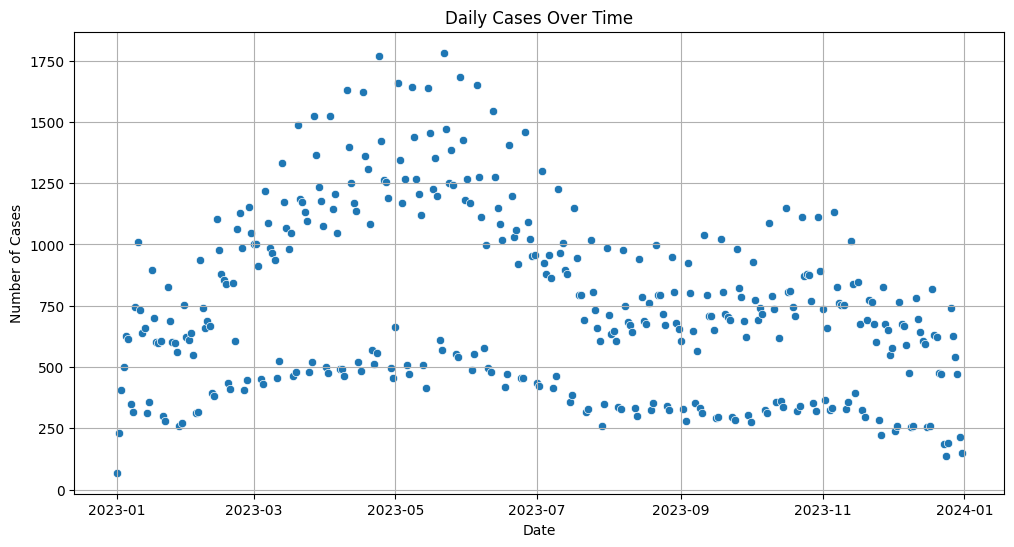

In [41]:
df23 = df3[['DT_NOTIFIC','SEM_NOT','DT_SIN_PRI']]
df23['DT_NOTIFIC'] = pd.to_datetime(df23['DT_NOTIFIC'], format="%Y-%m-%d" )
start_date = pd.Timestamp("2023-01-01")
end_date = pd.Timestamp("2023-12-31")
df23 = df23[(df23['DT_NOTIFIC'] >= start_date) & (df23['DT_NOTIFIC'] <= end_date)]
series23 = df23.groupby(df23['DT_NOTIFIC'].dt.date).size().reset_index(name='Cases')
series23.columns = ['Date', 'Number']
series23 = series23.sort_values('Date')
plt.figure(figsize=(12, 6))
sns.scatterplot(x="Date", y="Number", data=series23)  # Gráfico de pontos
plt.title('Daily Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.grid(True)
plt.show()

/tmp/ipykernel_144877/2765892757.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df24['DT_NOTIFIC'] = pd.to_datetime(df24['DT_NOTIFIC'], format="%Y-%m-%d" )


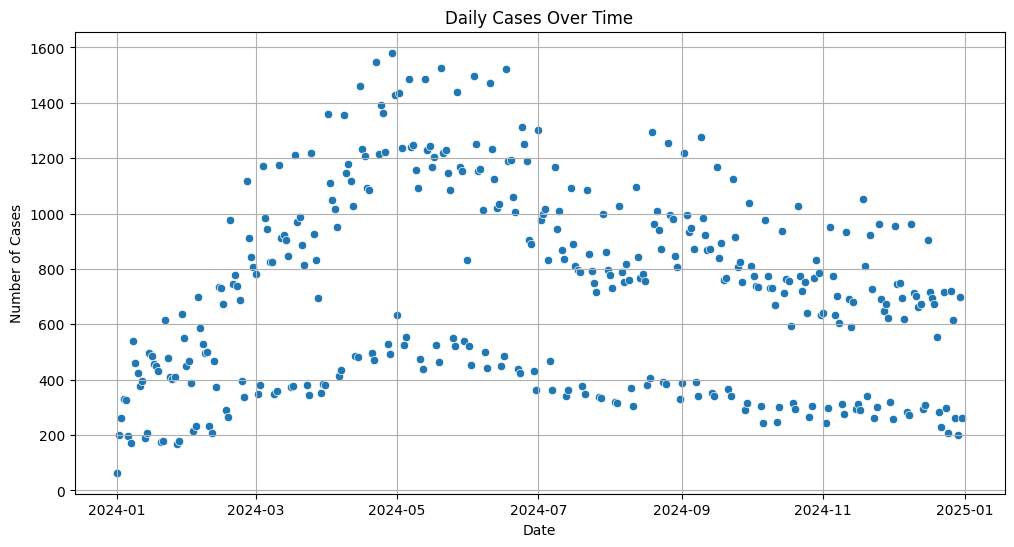

In [42]:
df24 = df4[['DT_NOTIFIC','SEM_NOT','DT_SIN_PRI']]
df24['DT_NOTIFIC'] = pd.to_datetime(df24['DT_NOTIFIC'], format="%Y-%m-%d" )
start_date = pd.Timestamp("2024-01-01")
end_date = pd.Timestamp("2024-12-31")
df24 = df24[(df24['DT_NOTIFIC'] >= start_date) & (df24['DT_NOTIFIC'] <= end_date)]
series24 = df24.groupby(df24['DT_NOTIFIC'].dt.date).size().reset_index(name='Cases')
series24.columns = ['Date', 'Number']
series24 = series24.sort_values('Date')
plt.figure(figsize=(12, 6))
sns.scatterplot(x="Date", y="Number", data=series24)  # Gráfico de pontos
plt.title('Daily Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.grid(True)
plt.show()

/tmp/ipykernel_144877/2217514754.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df25['DT_NOTIFIC'] = pd.to_datetime(df25['DT_NOTIFIC'], format="%Y-%m-%d" )


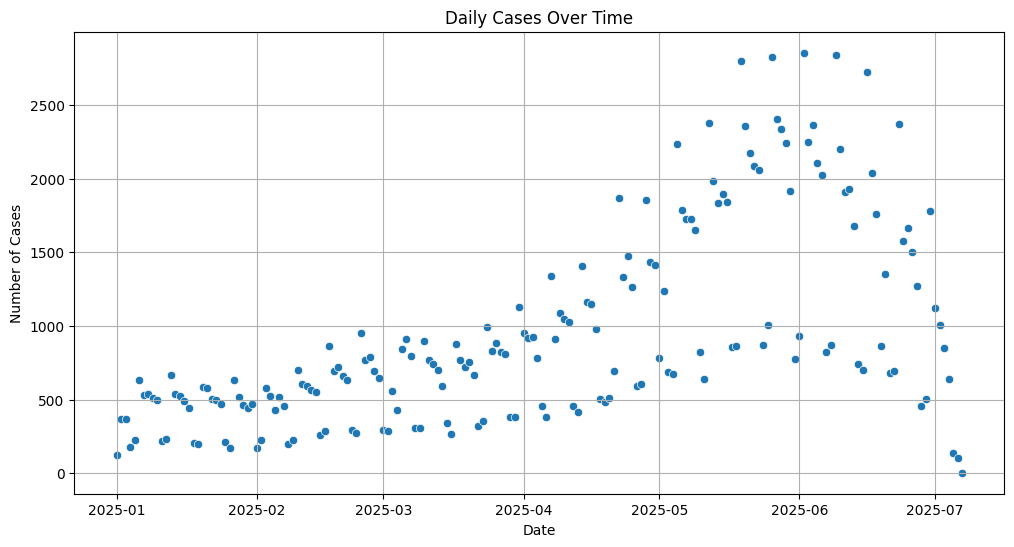

In [43]:
df25 = df5[['DT_NOTIFIC','SEM_NOT','DT_SIN_PRI']]
df25['DT_NOTIFIC'] = pd.to_datetime(df25['DT_NOTIFIC'], format="%Y-%m-%d" )
start_date = pd.Timestamp("2025-01-01")
end_date = pd.Timestamp("2025-12-31")
df25 = df25[(df25['DT_NOTIFIC'] >= start_date) & (df25['DT_NOTIFIC'] <= end_date)]
series25 = df25.groupby(df25['DT_NOTIFIC'].dt.date).size().reset_index(name='Cases')
series25.columns = ['Date', 'Number']
series25 = series25.sort_values('Date')
plt.figure(figsize=(12, 6))
sns.scatterplot(x="Date", y="Number", data=series25)  # Gráfico de pontos
plt.title('Daily Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.grid(True)
plt.show()

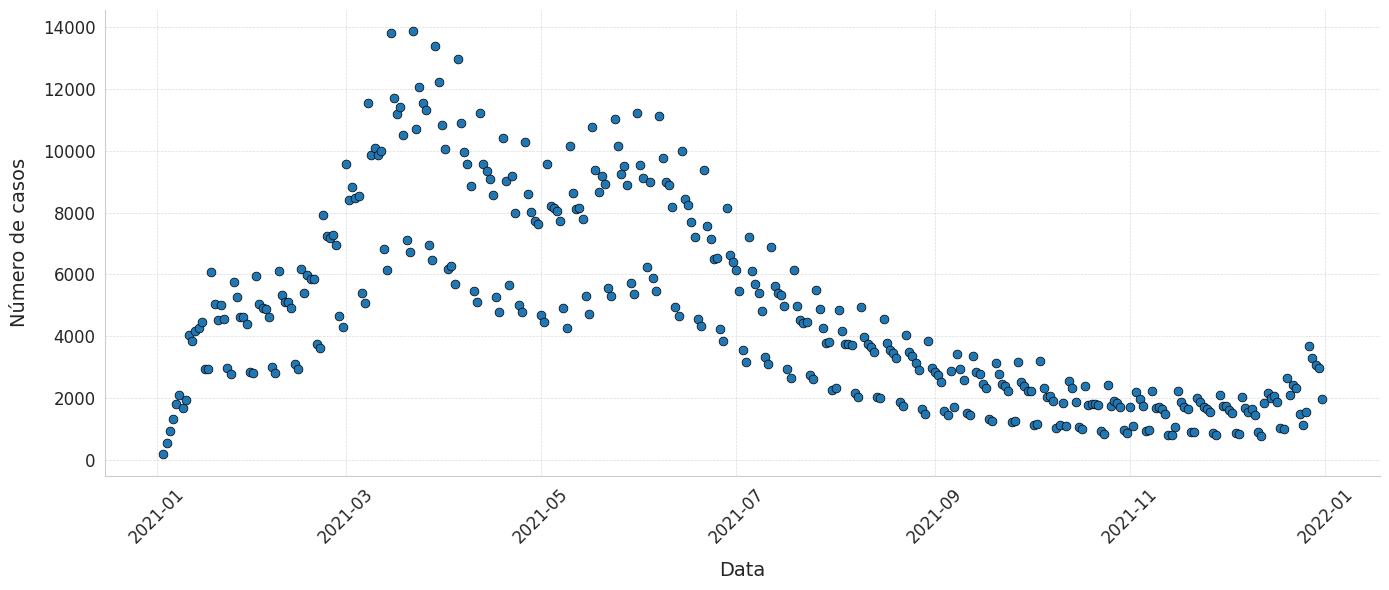

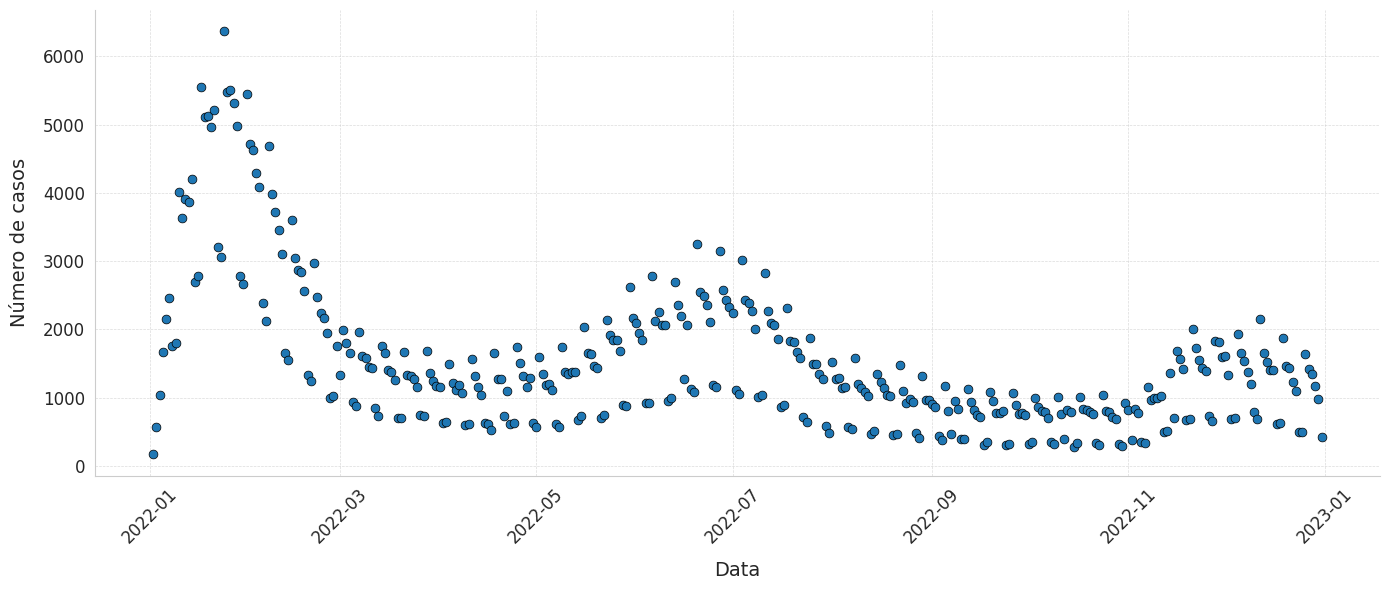

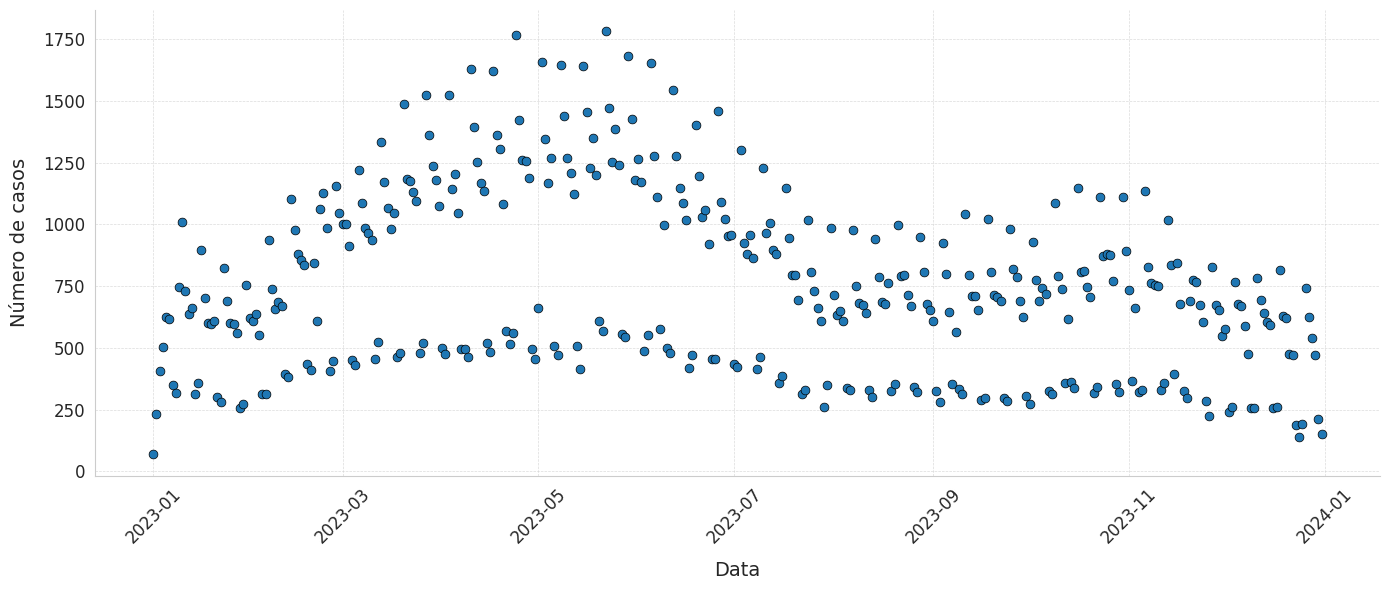

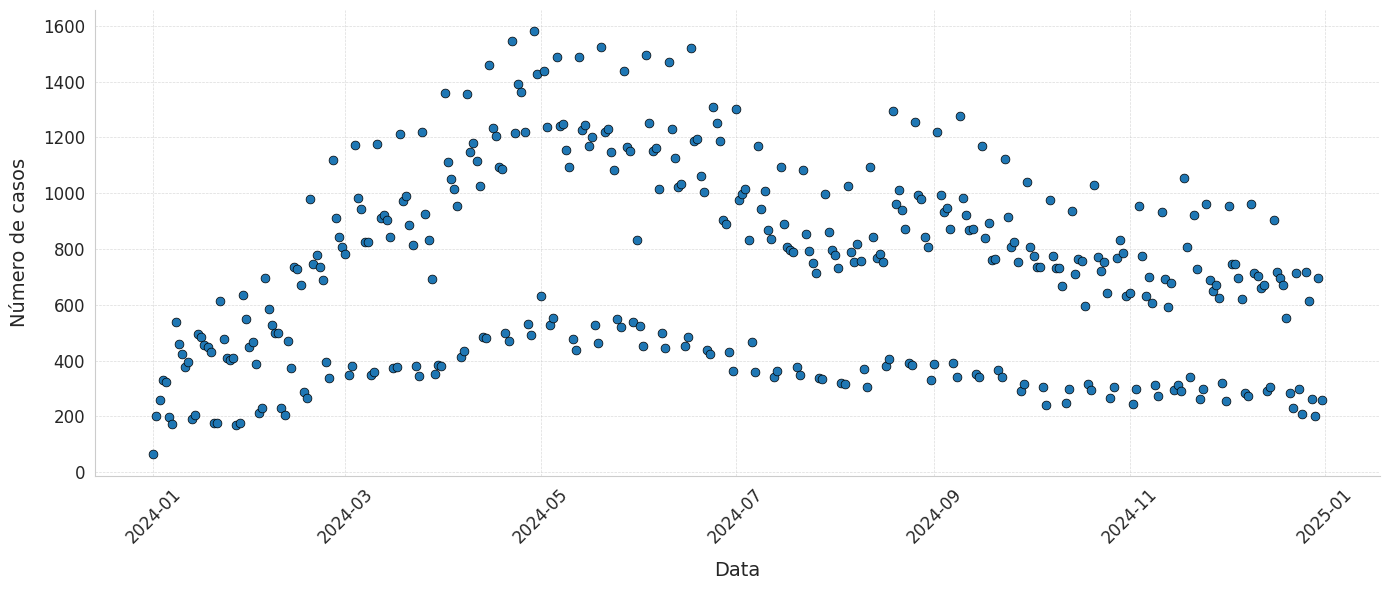

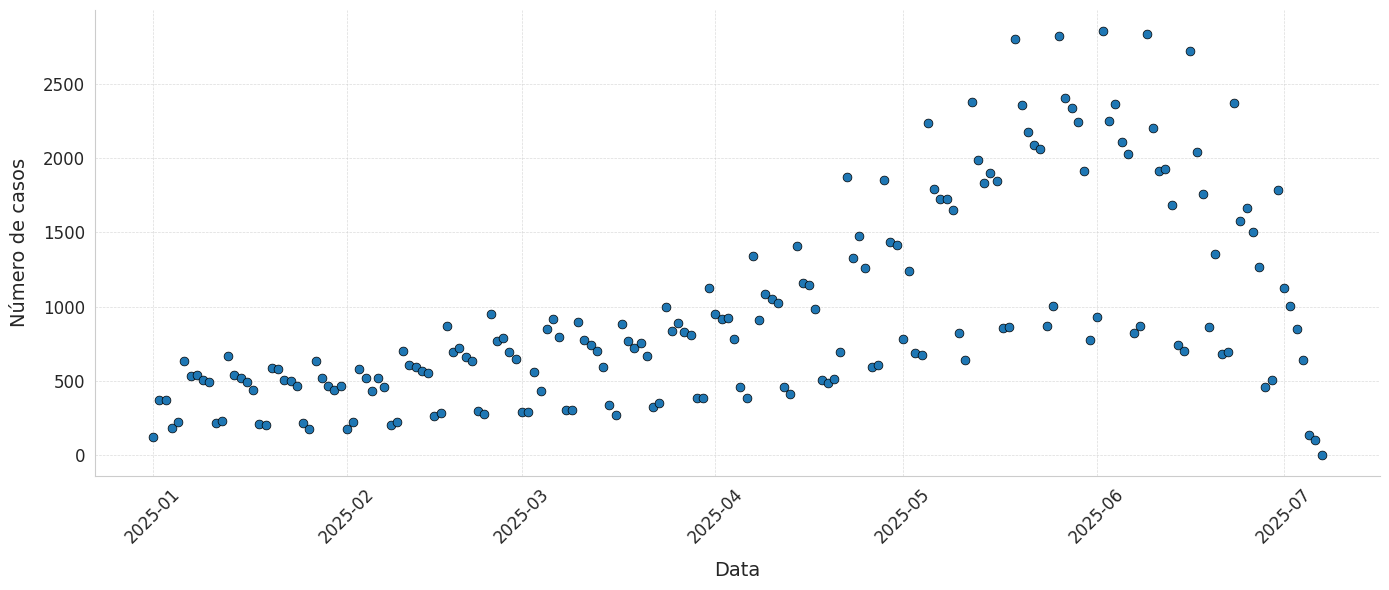

In [51]:
# Dicionário com os DataFrames por ano
series_dict = {
    "21": series21,
    "22": series22,
    "23": series23,
    "24": series24,
    "25": series25
}

for ano in ["21", "22", "23", "24", "25"]:
    df = series_dict[ano]

    plt.figure(figsize=(14, 6))
    sns.set_style("whitegrid")

    # Gráfico de dispersão
    sns.scatterplot(
        x="Date",
        y="Number",
        data=df,
        color="#1f77b4",
        s=40,
        edgecolor="black"
    )

    # Título e eixos
    # plt.title(f'Evolução diária dos casos em 20{ano}', fontsize=18, fontweight='bold', pad=20)
    plt.xlabel('Data', fontsize=14, labelpad=10)
    plt.ylabel('Número de casos', fontsize=14, labelpad=10)

    # Ticks
    plt.xticks(fontsize=12, rotation=45)
    plt.yticks(fontsize=12)

    # Grade e estilo
    plt.grid(True, which='major', linestyle='--', linewidth=0.5, alpha=0.7)
    sns.despine()

    plt.tight_layout()
    plt.show()

In [53]:
# Concatenar todas as séries
series = pd.concat([series21, series22, series23, series24, series25])

# Garantir que a coluna 'Date' esteja como datetime
series['Date'] = pd.to_datetime(series['Date'])

# Ordenar pela data
series = series.sort_values('Date').reset_index(drop=True)

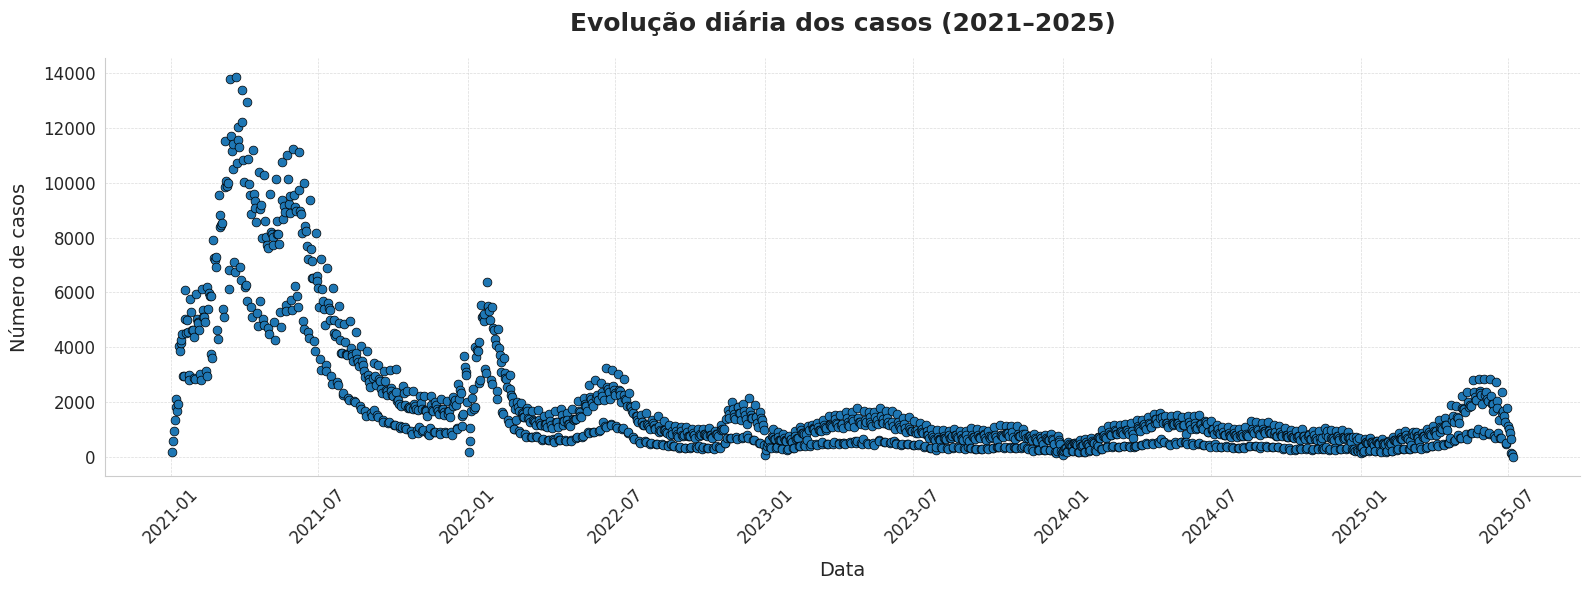

In [56]:
plt.figure(figsize=(16, 6))
sns.set_style("whitegrid")

# Gráfico de dispersão
sns.scatterplot(
    x="Date",
    y="Number",
    data=series,
    color="#1f77b4",
    s=40,
    edgecolor="black"
)

# Título e eixos
plt.title('Evolução diária dos casos (2021–2025)', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Data', fontsize=14, labelpad=10)
plt.ylabel('Número de casos', fontsize=14, labelpad=10)

# Ticks
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

# Grade e estilo
plt.grid(True, which='major', linestyle='--', linewidth=0.5, alpha=0.7)
sns.despine()

plt.tight_layout()
plt.show()

In [ ]:
series.info()